<a href="https://colab.research.google.com/github/luwc/students/blob/master/LSTM2454.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from keras import Sequential
from keras.layers import Input, Dense, LSTM, Dropout
np.random.seed(42)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-04-02 00:00:00+08:00,248.382295,249.866060,242.743987,244.524506,9989000,0.0,0.0
2015-04-07 00:00:00+08:00,244.524474,250.756287,244.524474,249.866028,11800000,0.0,0.0
2015-04-08 00:00:00+08:00,253.130311,253.130311,248.085510,249.866028,5969000,0.0,0.0
2015-04-09 00:00:00+08:00,252.833573,253.723832,249.866043,250.459549,5696000,0.0,0.0
2015-04-10 00:00:00+08:00,254.614107,254.614107,249.272552,250.162811,7566000,0.0,0.0


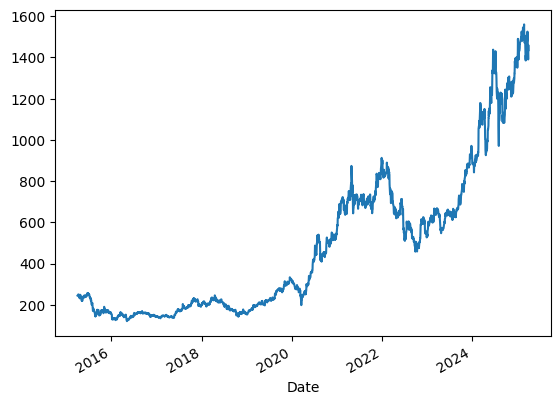

In [ ]:
import yfinance as yf
media = yf.Ticker("2454.TW")
hist = media.history(period="10Y", interval="1d", start=None, end=None, actions=True, auto_adjust=True, back_adjust=False)
hist['Close'].plot()
hist.head()

In [ ]:
hist_len=len(hist)
print("data observation", hist_len)
x_train_set=hist.iloc[:,3].values
print(x_train_set)


data observation 2435
[ 244.52450562  249.86602783  249.86602783 ... 1390.         1460.
 1435.        ]


In [ ]:
def create_dataset(dataset, look_back=1):
    Xdata, Ydata = [], []
    for i in range(len(hist)-look_back-1):  # Changed len(hist) to len(dataset)
        a = dataset[i:(i+look_back)]    # Removed the second index [0]
        Xdata.append(a)
        Ydata.append(dataset[i + look_back])  # Removed the second index [0]
    return np.array(Xdata), np.array(Ydata)

In [ ]:
look_back = 60
x_train, y_train= create_dataset(x_train_set, look_back)

print("回看天數:", look_back)
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)
print(x_train[0])
print(x_train[1])
print(y_train[0])




回看天數: 60
x_train.shape: (2374, 60)
y_train.shape: (2374,)
[244.52450562 249.86602783 249.86602783 250.45954895 250.16281128
 248.97576904 246.30499268 236.512146   242.74398804 237.99591064
 231.46733093 232.06091309 238.58943176 239.18292236 248.67900085
 243.63426208 236.80895996 237.69914246 234.43487549 225.5322876
 222.26799011 219.59719849 218.70695496 223.45500183 219.59719849
 220.48751831 235.91868591 233.24786377 231.46733093 232.3576355
 232.65437317 237.10568237 237.40240479 243.33744812 235.91868591
 237.10568237 237.40240479 242.74398804 246.008255   243.33744812
 243.33744812 243.33744812 239.18292236 237.69914246 237.69914246
 238.29266357 239.47964478 239.47964478 246.89848328 242.74398804
 244.82124329 251.94332886 250.75624084 257.58163452 252.83358765
 250.16281128 256.69137573 252.24008179 252.83358765 250.45954895]
[249.86602783 249.86602783 250.45954895 250.16281128 248.97576904
 246.30499268 236.512146   242.74398804 237.99591064 231.46733093
 232.06091309 238.5

In [ ]:
sc=MinMaxScaler(feature_range=(0,1))
x_train=sc.fit_transform(x_train)
y_train=sc.fit_transform(y_train.reshape(-1,1))
print(x_train[0])
print(y_train[0])

[0.09397924 0.09803606 0.09803606 0.09848683 0.09826146 0.09735992
 0.0953315  0.08789396 0.08907279 0.08560505 0.08083694 0.08127046
 0.08603853 0.08647198 0.0934074  0.089723   0.08473817 0.08538831
 0.08300427 0.07650231 0.07358085 0.07164439 0.06973489 0.07311617
 0.07036887 0.0710029  0.08199208 0.08009007 0.07882208 0.0794561
 0.07854867 0.08167411 0.08188246 0.08604969 0.08084068 0.08167411
 0.081596   0.0847405  0.08700859 0.08515285 0.08515285 0.08515285
 0.08226619 0.08123523 0.08123523 0.08164762 0.08247236 0.08247236
 0.08762714 0.0847405  0.08618383 0.09113241 0.0903076  0.09505004
 0.09175099 0.08989527 0.09443146 0.0913386  0.09175099 0.09010145]
[0.09236955]


In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)


x_train.shape: (2374, 60, 1)
y_train.shape: (2374, 1)


In [ ]:
model=Sequential()
model.add(Input(shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=True, activation="tanh"))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True, activation="tanh"))
model.add(Dropout(0.2))
model.add(LSTM(units=50,activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mean_squared_error")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, epochs=100, batch_size=32)
print("訓練完成")
print("Saving Model: stockprice" +str(look_back)+".keras...")
model.save("stockprice" +str(look_back)+".keras")

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - loss: 0.0234
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 0.0024
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - loss: 0.0020
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - loss: 0.0020
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - loss: 0.0022
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - loss: 0.0015
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - loss: 0.0016
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - loss: 0.0019
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 0.0014
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0015
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - loss: 0.0014
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 105ms/step - loss: 0.0016
Epoch 13/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - loss: 0.0013
Epoch 14/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - loss: 0.0015
Epoch 15/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 75

In [ ]:
X_test_pred=model.predict(x_train)
y_test_pred=sc.inverse_transform(X_test_pred)
y_train=sc.inverse_transform(y_train)
print(y_test_pred)
mse = np.mean(np.square(y_test_pred - y_train))
print("MSE:", mse)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step
[[ 263.79752]
 [ 263.6296 ]
 [ 263.06735]
 ...
 [1477.232  ]
 [1457.8112 ]
 [1413.936  ]]
MSE: 427.2461687438075


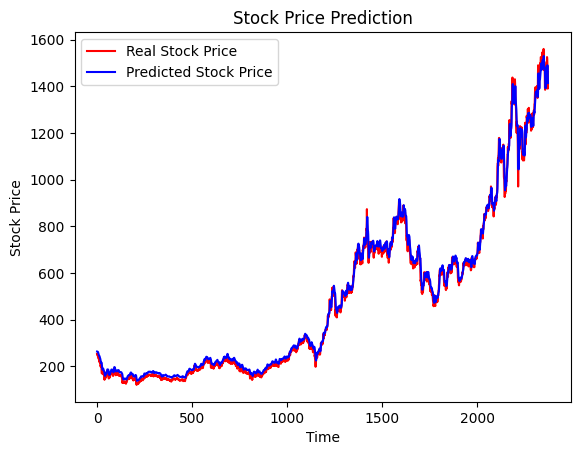

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_train, color = 'red', label = 'Real Stock Price')
plt.plot(y_test_pred, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()